# Student Performance Indicator

## Life cycle of Machine Learning project
- Understanding the problem statement
- Data collection
- Data checks to confirm
- Exploratory data analysis
- Data pre-processing
- Model training
- Choose best model

## 1) Problem Statement 
This project understands how the student's performance (test cores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course

## 2) Data Collection
- Dataset Source - "https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data"
- Data consists of 8 column and 1000 rows.

## 2a) Importing Library

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np #type:ignore
import matplotlib.pyplot as plt #type:ignore
import pandas as pd #type:ignore
import seaborn as sns #type:ignore

### Import CSV Data as Pandas DataFrame

In [5]:
df = pd.read_csv('/Users/sumitsaha/Desktop/DataScience_Udemy/ML_Project_Practice/data/stud.csv')
# from Source.logger import logging
# logging.info('Hi')

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.shape

(1000, 8)

## 3)Data checks to perform
    Check missing values
    Check duplicate values
    Check data type
    Check the number of unique values of each column
    Check stat of dataset
    Check various categoris present in different categorical column

### 3.1 Checking missing values

In [8]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There is no missing values

### 3b) Checking duplicates values

In [9]:
df.duplicated().sum()

0

#### There is no duplicates values in the dataset

### 3.3) Checking data type

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4) Checking the number of unique values of each column

In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Check statistics of dataset

In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Exploring Data

In [13]:
print("Categories in 'gender' variable:  ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" " )
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:  ",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:  ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:  ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:   ['none' 'completed']


#### Define numerical and categorical columns

In [14]:
Num_column = [column for column in df.columns if df[column].dtype!='O']
Num_column

['math_score', 'reading_score', 'writing_score']

In [15]:
Cat_column = [column for column in df.columns if df[column].dtype=='O']
Cat_column

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

### Adding Total Score and Average in Columns

In [16]:
df['total_score']= df['math_score']+df['reading_score']+df['writing_score']
df['avg_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


#### Full marks students

In [17]:
reading_full = df[df['reading_score'] == 100]['avg_score'].count()
writing_full = df[df['writing_score'] ==100]['avg_score'].count()
math_full = df[df['math_score']==100]['avg_score'].count()

print(f'Number of students with full marks in math: {math_full}')
print(f'Number of students with full marks in writing: {writing_full}')
print(f'Number of students with full marks in reading: {reading_full}')

Number of students with full marks in math: 7
Number of students with full marks in writing: 14
Number of students with full marks in reading: 17


#### Less than 20 mark student

In [18]:
reading_less_20 = df[df['reading_score'] <= 20]['avg_score'].count()
writing_less_20 = df[df['writing_score'] <=20]['avg_score'].count()
math_less_20 = df[df['math_score']<=20]['avg_score'].count()

print(f'Number of students with less than 20 marks in math: {math_less_20}')
print(f'Number of students with less than 20 marks in writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in reading: {reading_less_20}')

Number of students with less than 20 marks in math: 4
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in reading: 1


## 4) Exploring Data (Visualization)

### 4.1) Visualize average score distribution to make some conclusion
    Histogram
    KDE

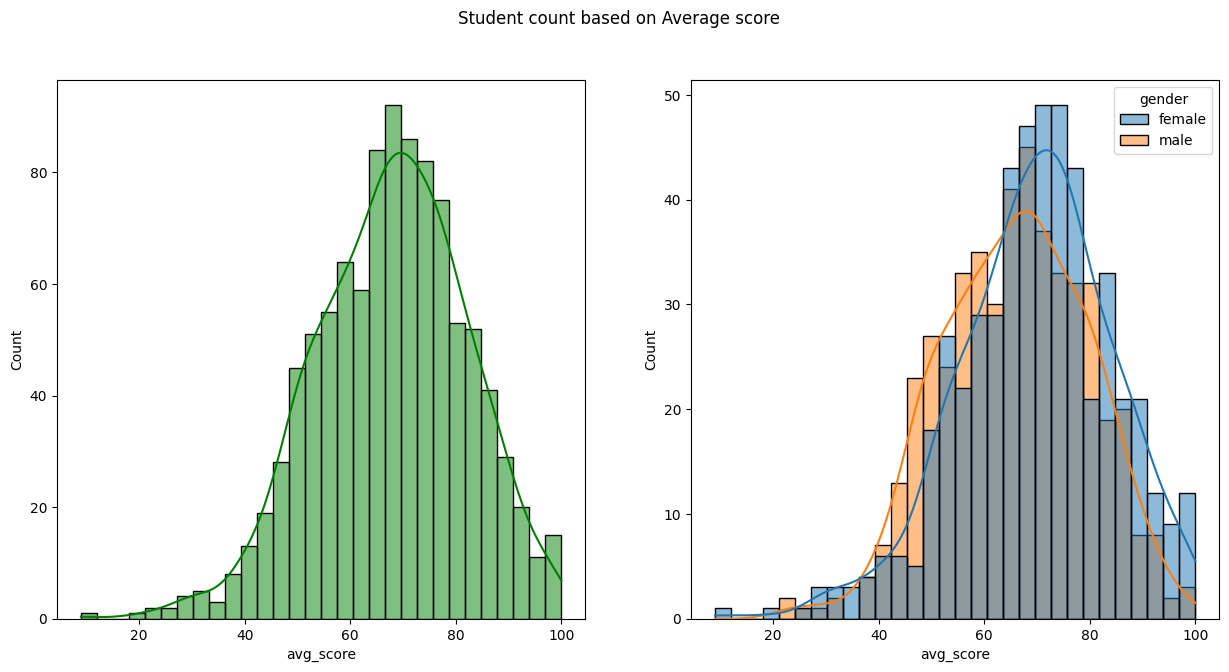

In [19]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
fig.suptitle('Student count based on Average score')
plt.subplot(1,2,1)
sns.histplot(data=df,x=df['avg_score'],kde=True,bins=30,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x=df['avg_score'],bins=30,kde=True,hue=df['gender'])
plt.show()


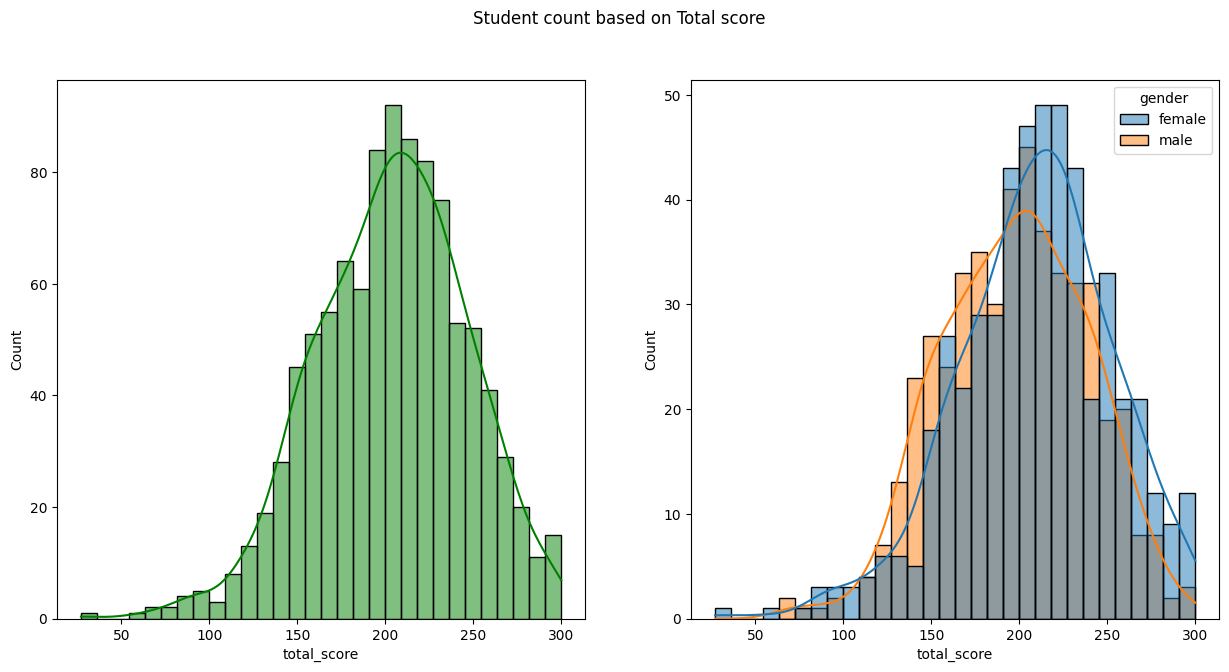

In [20]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
fig.suptitle('Student count based on Total score')
plt.subplot(1,2,1)
sns.histplot(data=df,x=df['total_score'],kde=True,bins=30,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x=df['total_score'],bins=30,kde=True,hue=df['gender'])
plt.show()


##### As the trend, Female student perform better than male students

<Axes: title={'center': 'Female only'}, xlabel='avg_score', ylabel='Count'>

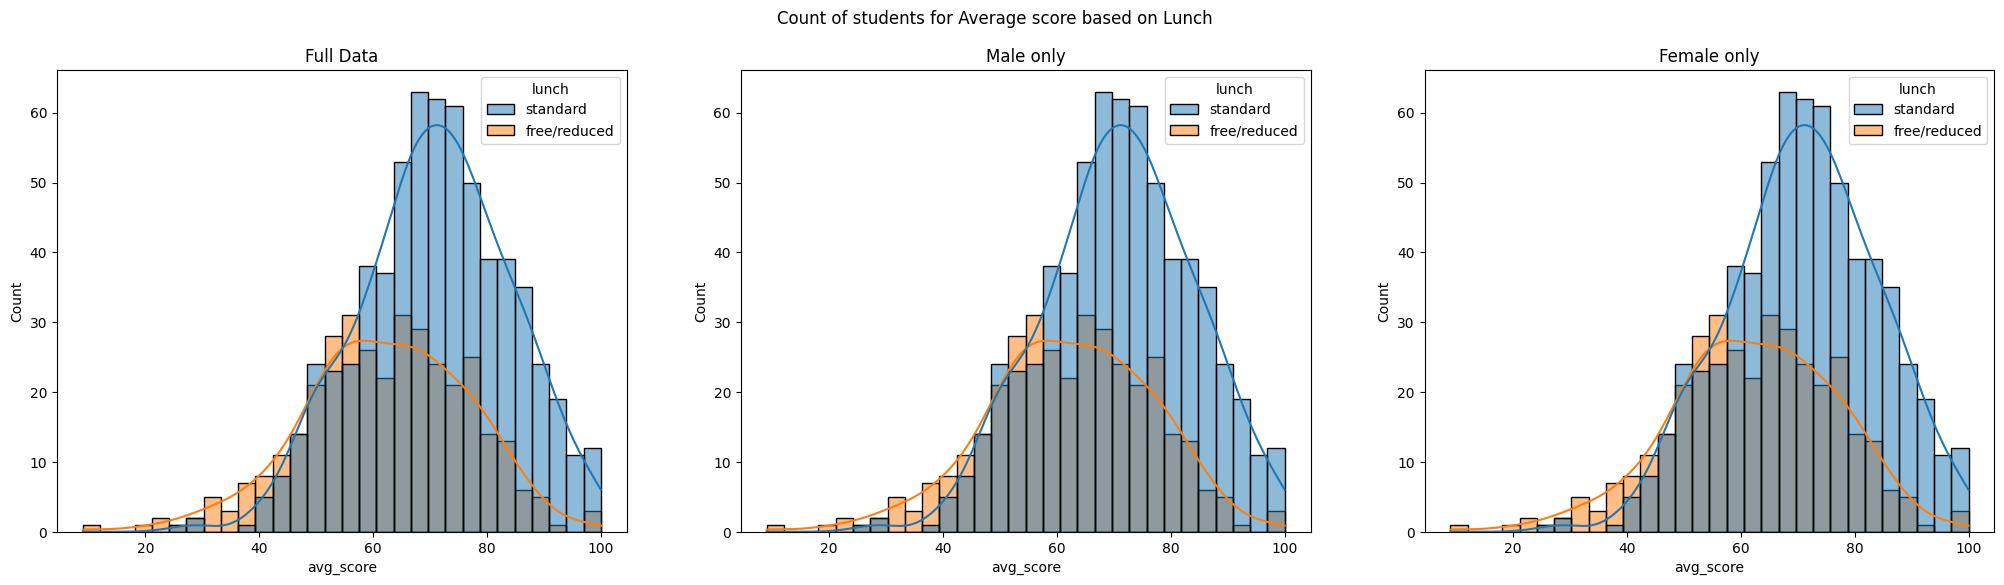

In [21]:
fig, axs = plt.subplots(1,3,figsize=(25,6))
fig.suptitle('Count of students for Average score based on Lunch')
plt.subplot(1,3,1)
plt.title('Full Data')
sns.histplot(data=df,x=df['avg_score'],hue=df['lunch'],kde=True,bins=30)
plt.subplot(1,3,2)
plt.title('Male only')
sns.histplot(data=df[df.gender=='male'],x=df['avg_score'],hue=df['lunch'],kde=True,bins=30)
plt.subplot(1,3,3)
plt.title('Female only')
sns.histplot(data=df[df['gender']=='female'],x=df['avg_score'],kde=True,hue=df['lunch'],bins=30)

In [22]:
df['parental_level_of_education']

0       bachelor's degree
1            some college
2         master's degree
3      associate's degree
4            some college
              ...        
995       master's degree
996           high school
997           high school
998          some college
999          some college
Name: parental_level_of_education, Length: 1000, dtype: object

##### Checking avg_Score based on parent education

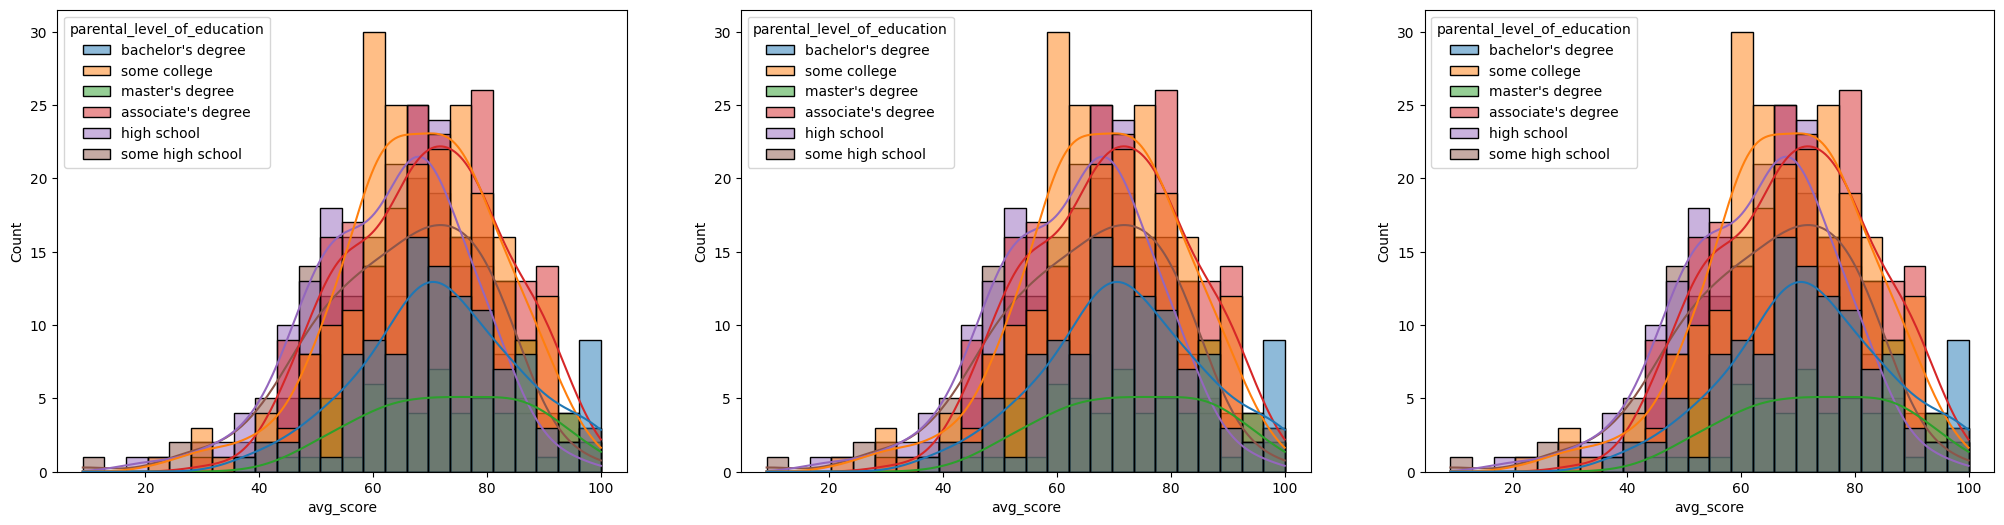

In [23]:
fig,ax = plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x=df['avg_score'],kde=True,hue=df['parental_level_of_education'])
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='male'],kde=True,hue=df['parental_level_of_education'],x=df['avg_score'])
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='female'],kde=True,hue=df['parental_level_of_education'],x=df['avg_score'])
plt.show()

##### Parents education is not affected in student performance

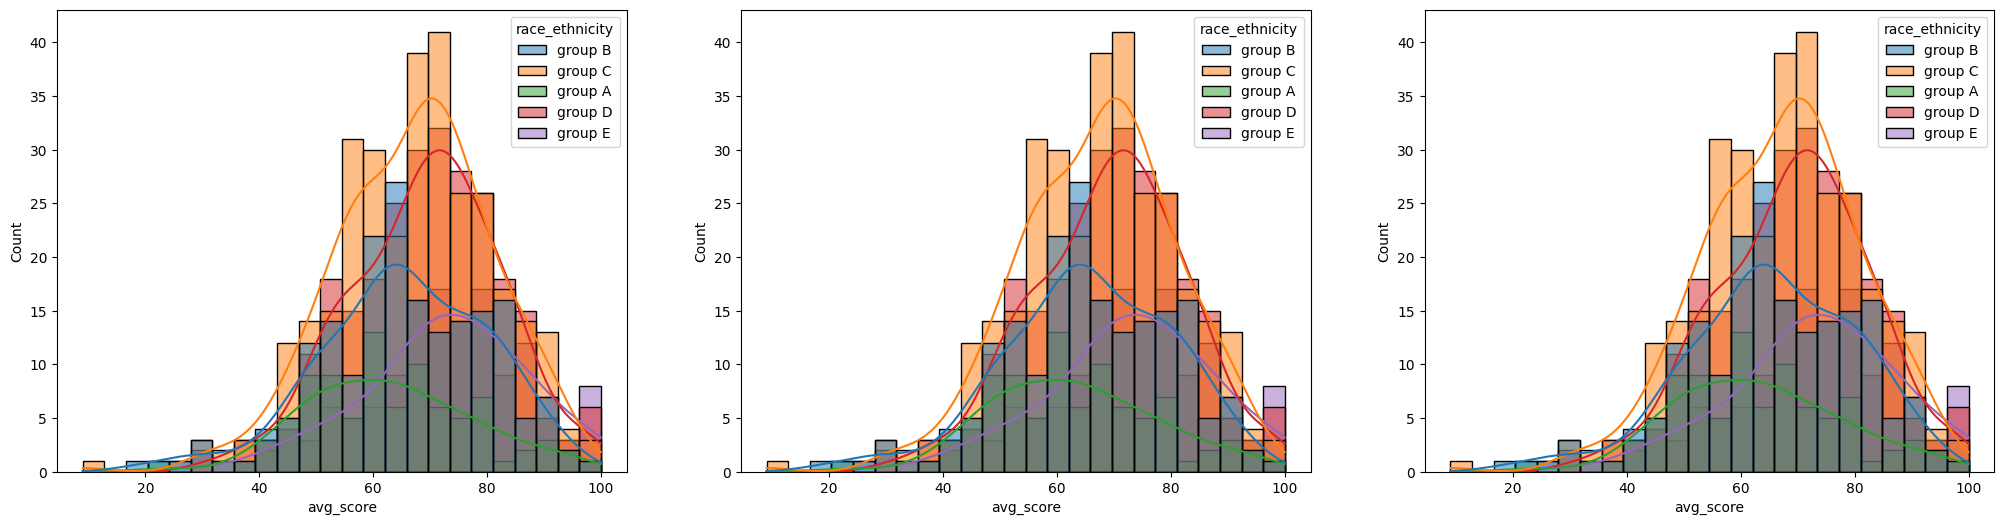

In [24]:
fig,ax = plt.subplots(1,3,figsize=(25,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x=df['avg_score'],hue=df['race_ethnicity'],kde=True)
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='male'],x=df['avg_score'],hue=df['race_ethnicity'],kde=True)
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='female'],x=df['avg_score'],hue=df['race_ethnicity'],kde=True)
plt.show()

#### 4.2) Maximum score in all three subjects

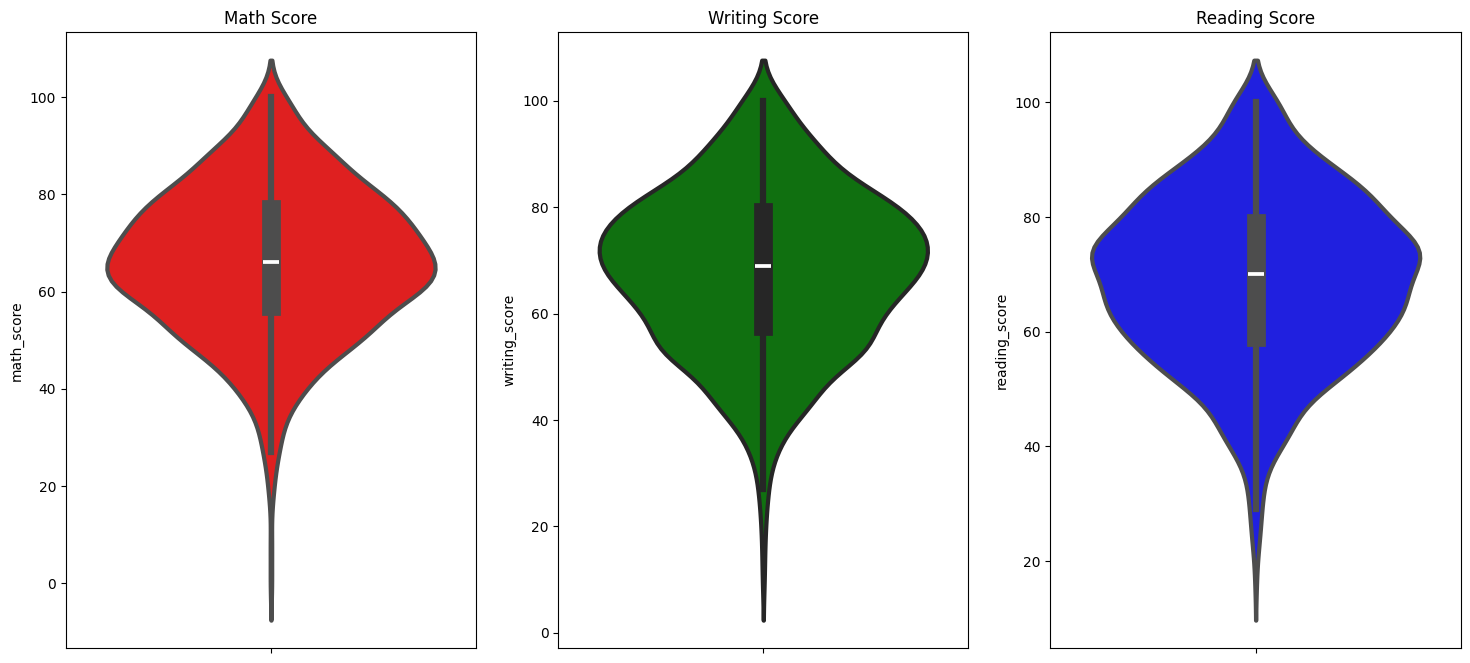

In [25]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
plt.title('Math Score')
sns.violinplot(data=df,y=df['math_score'],color='r',linewidth=3)
plt.subplot(1,3,2)
plt.title('Writing Score')
sns.violinplot(data=df,y=df['writing_score'],color='g',linewidth=3)
plt.subplot(1,3,3)
plt.title('Reading Score')
sns.violinplot(data=df,y=df['reading_score'],color='b',linewidth=3)
plt.show()

##### Most of the student score between 50 to 80 in asll 3 subjects

#### 4.3) Multivariate analysis

In [26]:
Cat_column

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [27]:
df['test_preparation_course'].value_counts()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64

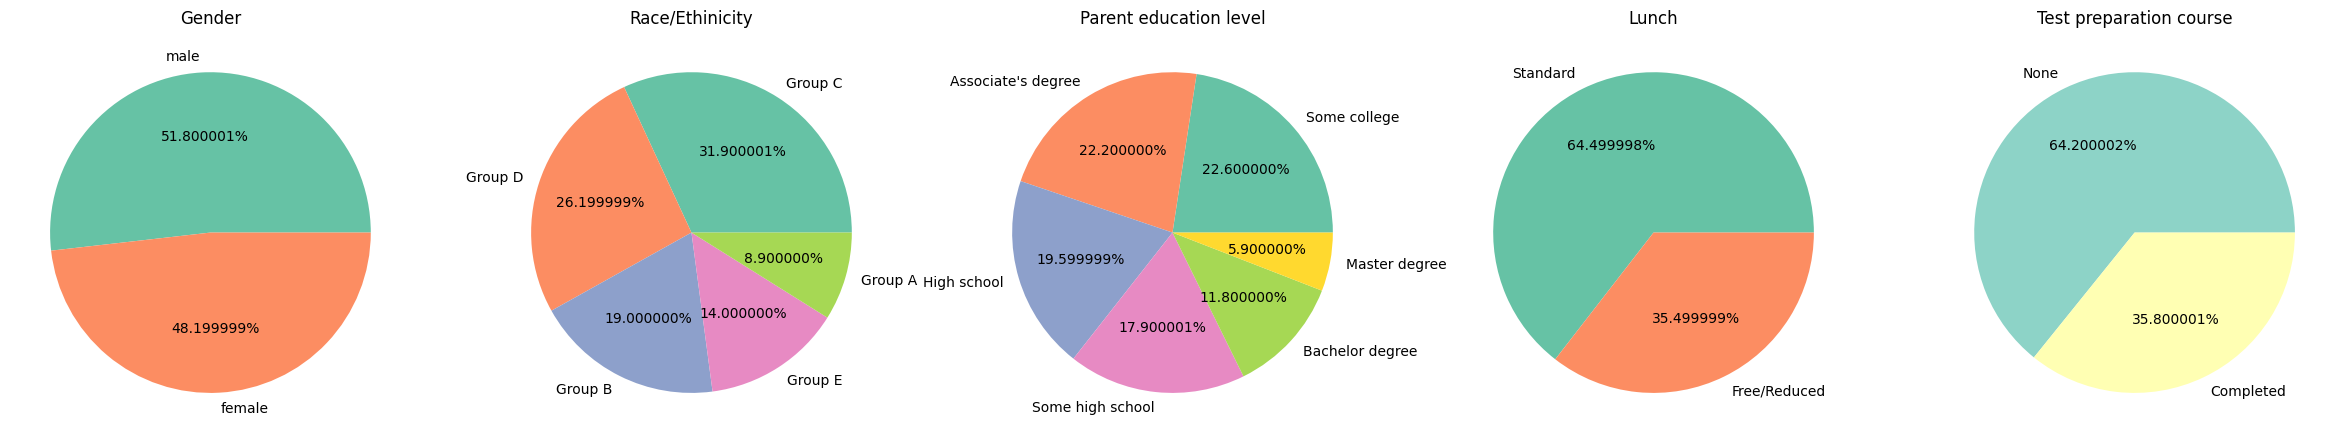

In [28]:
fig,ax = plt.subplots(1,5,figsize=(30,12))
## Gender

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = ['male','female']

plt.pie(x=size,labels=labels,autopct='%2f%%',colors=sns.color_palette('Set2'))
plt.title('Gender')
plt.axis('off')

## Race_ethinicity

plt.subplot(1,5,2)
plt.title('Race/Ethinicity')
size = df['race_ethnicity'].value_counts()
labels=['Group C','Group D','Group B','Group E','Group A']

plt.pie(x=size,labels=labels,colors=sns.color_palette('Set2'),autopct='%2f%%')

## Parental_level_of_education

plt.subplot(1,5,3)
plt.title('Parent education level')
size = df['parental_level_of_education'].value_counts()
labels=['Some college',"Associate's degree",'High school','Some high school','Bachelor degree','Master degree']

plt.pie(x=size,labels=labels,colors=sns.color_palette('Set2'),autopct='%2f%%')

## Lunch

plt.subplot(1,5,4)
plt.title('Lunch')
size = df['lunch'].value_counts()
labels=['Standard','Free/Reduced']

plt.pie(x=size,labels=labels,colors=sns.color_palette('Set2'),autopct='%2f%%')


## Test preparation course

plt.subplot(1,5,5)
plt.title('Test preparation course')
size=df['test_preparation_course'].value_counts()
labels=['None','Completed']

plt.pie(x=size,labels=labels,autopct='%2f%%',colors=sns.color_palette('Set3'))


plt.show()

##### Insights
- Number of male and females are equals in Gender
- Number of students are greatest in Group C
- Number of students whose parent education qualification is some collega nd associate degree is greatest
- Number of student who have standard lunch are greater
- Number of student who have not enrolled in test preparation course is greater

#### 4.4) Checking Outliers

In [29]:
Num_column

['math_score', 'reading_score', 'writing_score']

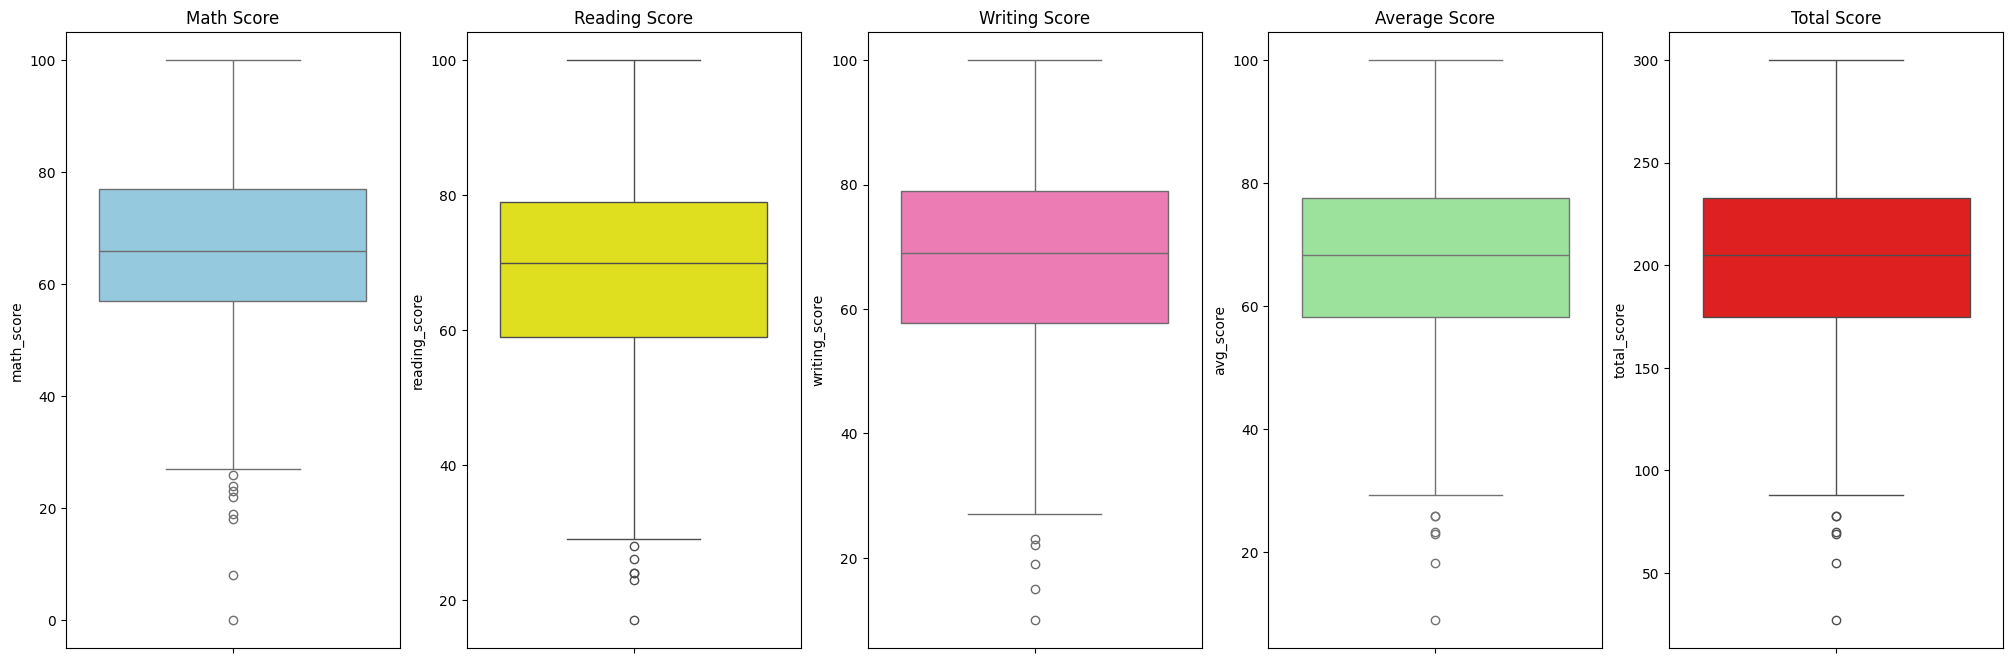

In [30]:
fig,ax = plt.subplots(1,5,figsize=(25,8))

plt.subplot(1,5,1)
plt.title('Math Score')
sns.boxplot(df['math_score'],color='skyblue')


plt.subplot(1,5,2)
plt.title('Reading Score')
sns.boxplot(df['reading_score'],color='yellow')

plt.subplot(1,5,3)
plt.title('Writing Score')
sns.boxplot(df['writing_score'],color='hotpink')

plt.subplot(1,5,4)
plt.title('Average Score')
sns.boxplot(df['avg_score'],color='lightgreen')

plt.subplot(1,5,5)
plt.title('Total Score')
sns.boxplot(df['total_score'],color='red')

plt.show()

#### 4.5) Multivariate Analysis

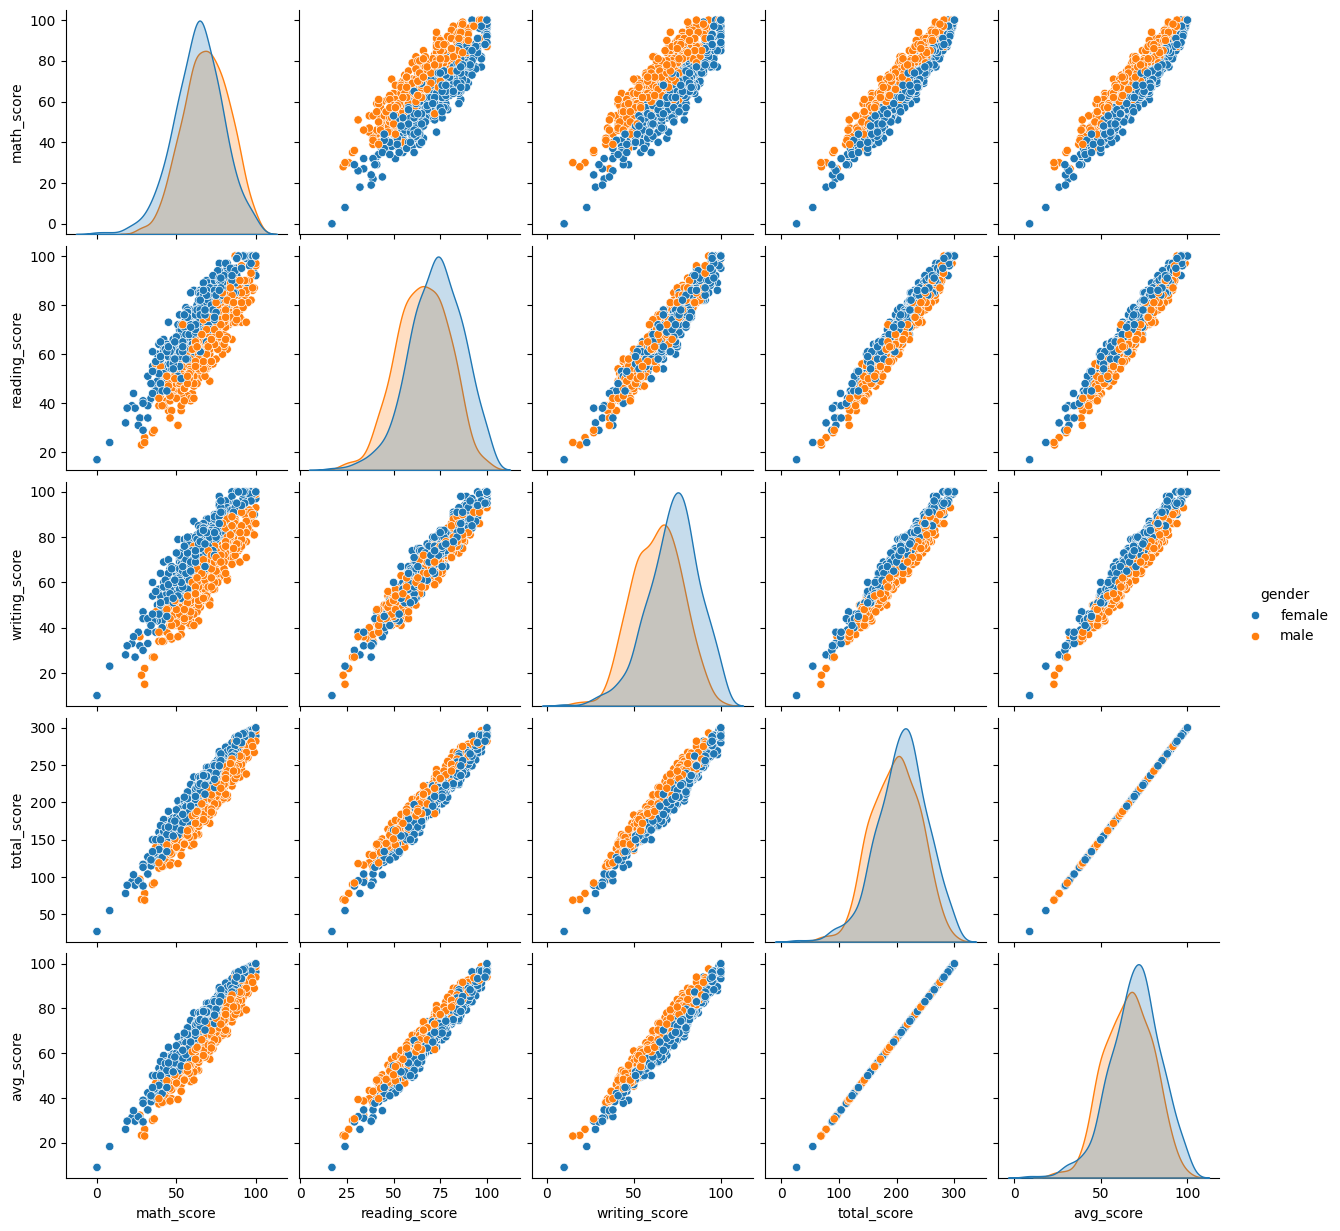

In [31]:
sns.pairplot(df,hue='gender')
plt.show()